# Presentación 14:

En esta clase continuarémos examinando los procedimientos que existen en Python para el modelamiento de series de tiempo.

Para esto consideremos los datos relacionados con Accidentes Eléctricos en Colombia y que están disponibles en el sitio [(CLICK AQUÍ)](https://www.datos.gov.co/Minas-y-Energ-a/Superservicios-Informaci-n-de-Accidentes-de-Origen/es62-3x6p). 

La base de datos en formato Excel también está disponible en la carpeta de bases de datos del curso con el nombre de __accidentes_electricos.xlsx__ y cuyo link está en el Moodle del curso.

In [2]:
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos

In [3]:
# La hoja bd1 contiene la base de datos de interés:
acce = pd.read_excel("../../DATOS/accidentes_electricos.xlsx", sheet_name="bd1", parse_dates=["FECHA"]) 

In [4]:
acce.shape

(3161, 23)

In [5]:
acce.dtypes

IDENTIFICADOR_EMPRESA           float64
EMPRESA                          object
FECHA                    datetime64[ns]
ANIO                              int64
TRIMESTRE                         int64
HORA                             object
COD_DANE                          int64
DEPARTAMENTO                     object
MUNICIPIO                        object
CENTRO_POBLADO                   object
UBICACION                        object
SEXO                             object
EDAD                              int64
TIPO_IDENTIFICACION              object
VINCULADO_EMPRESA                object
TIPO_VINCULACION                 object
GRADO_ESCOLARIDAD                object
TIEMPO_VINCULACION              float64
SECCION_EMPRESA                  object
TIPO_LESION                      object
ORIGEN_ACCIDENTE                 object
CAUSA_ACCIDENTE                  object
MEDIDAS                          object
dtype: object

In [6]:
acce.head()

,IDENTIFICADOR_EMPRESA,EMPRESA,FECHA,ANIO,TRIMESTRE,HORA,COD_DANE,DEPARTAMENTO,MUNICIPIO,CENTRO_POBLADO,...,TIPO_IDENTIFICACION,VINCULADO_EMPRESA,TIPO_VINCULACION,GRADO_ESCOLARIDAD,TIEMPO_VINCULACION,SECCION_EMPRESA,TIPO_LESION,ORIGEN_ACCIDENTE,CAUSA_ACCIDENTE,MEDIDAS
0,3226.0,EMPRESA DISTRIBUIDORA DEL PACIFICO S.A. E.S.P,2013-01-23,2013,1,16:00:00,27361000,CHOCO,ISTMINA,ISTMINA,...,C.C.,S,TEMPORAL,BACHILLER,12.000,Mantenimiento - Distribución,Quemaduras,Falta conductor puesta a tierra,Contacto Indirecto,Se dictaron charlas al persnal operativo sobre...
1,2249.0,ELECTRIFICADORA DEL CARIBE S.A. E.S.P.,2011-10-14,2011,4,11:43:00,13430000,BOLIVAR,MAGANGUE,MAGANGUE,...,C.C.,N,NO APLICA,OTRO,11.111,Mantenimiento - Distribución,Quemaduras,Violación de distancias de seguridad,Contacto Directo,Se reubico la linea de media tension abriendol...
2,3370.0,EMPRESA DE ENERGIA DE CASANARE SA ESP,2015-05-09,2015,3,09:15:00,85263000,CASANARE,PORE,PORE,...,C.C.,S,CONTRATISTA,TÉCNICO,6.000,Operación - Distribución,Quemaduras,Fallas de operación,Contacto Directo,Instalacion correcta puesta a tierra Reforzar ...
3,23442.0,COMPAÑIA ENERGETICA DE OCCIDENTE S.A.S. E.S.P.,2014-11-27,2014,4,11:40:00,19698020,CAUCA,SANTANDER DE QUILICHAO,QUINAMAYO,...,C.C.,S,CONTRATISTA,BÁSICA PRIMARIA,2.000,Otro - Distribución,Muerte,Violación de distancias de seguridad,Contacto Indirecto,Realizar un programa de capacitacion de identi...
4,2249.0,ELECTRIFICADORA DEL CARIBE S.A. E.S.P.,2014-01-09,2014,3,09:15:00,8001000,ATLANTICO,BARRANQUILLA,BARRANQUILLA,...,N.N.,N,NO APLICA,OTRO,11.111,Mantenimiento - Distribución,Otra,Otra,Contacto Indirecto,Se cambio el conductor del neutro y se le reco...


In [7]:
acce.tail()

,IDENTIFICADOR_EMPRESA,EMPRESA,FECHA,ANIO,TRIMESTRE,HORA,COD_DANE,DEPARTAMENTO,MUNICIPIO,CENTRO_POBLADO,...,TIPO_IDENTIFICACION,VINCULADO_EMPRESA,TIPO_VINCULACION,GRADO_ESCOLARIDAD,TIEMPO_VINCULACION,SECCION_EMPRESA,TIPO_LESION,ORIGEN_ACCIDENTE,CAUSA_ACCIDENTE,MEDIDAS
3156,3247.0,EMPRESA MULTIPROPÓSITO DE CALARCÁ S.A.S. E.S.P.,2012-11-13,2012,4,08:40:00,63130000,QUINDIO,CALARCA,CALARCA,...,C.C.,S,TEMPORAL,BACHILLER,1.000,Mantenimiento - Generación,Traumatismos,Fallas de mantenimiento,Otra,REINDUCCION EN SALUD OCUPACIONAL AL COLABORADO...
3157,3372.0,A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.,2021-01-10,2021,4,16:20:00,52001000,NARINO,PASTO,SAN JUAN DE PASTO,...,N.N.,N,NO APLICA,BÁSICA PRIMARIA,11.111,Otro - Comercialización,Otra,Otra,Otra,CUMPLIMIENTO DE PROTOCOLOS
3158,3247.0,EMPRESA MULTIPROPÓSITO DE CALARCÁ S.A.S. E.S.P.,2014-04-25,2014,2,17:50:00,63130000,QUINDIO,CALARCA,CALARCA,...,C.C.,S,PLANTA,BACHILLER,1.000,Mantenimiento - Generación,Traumatismos,Fallas de operación,Otra,MANTENIMIENTO A LA VOLANTE GENERADORA DEL ACCI...
3159,600.0,ELECTRIFICADORA DEL META S.A. E.S.P.,2021-07-16,2021,3,13:04:00,50573000,META,PUERTO LOPEZ,PUERTO LOPEZ,...,C.C.,N,NO APLICA,OTRO,11.111,Operación - Transmisión,Otra,Violación de distancias de seguridad,Contacto Indirecto,cartilla del usuario
3160,600.0,ELECTRIFICADORA DEL META S.A. E.S.P.,2021-11-29,2021,4,10:05:00,50568000,META,PUERTO GAITAN,PUERTO GAITAN,...,N.N.,N,NO APLICA,TÉCNICO SENA,11.111,Operación - Transmisión,Otra,Violación de distancias de seguridad,Contacto Indirecto,cartilla del usuario


In [8]:
acce["dia"] = pd.DatetimeIndex(acce["FECHA"]).day
acce["dia_sem"] = pd.DatetimeIndex(acce["FECHA"]).weekday
# Podemos cambiarlo con:
dia_aux1 = acce.dia_sem.unique()
dia_aux2 = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado","Domingo"]
acce.dia_sem.replace(to_replace=dia_aux1, value=dia_aux2, inplace=True)

acce["mes"] = pd.DatetimeIndex(acce["FECHA"]).month
acce["anio"] = pd.DatetimeIndex(acce["FECHA"]).year

Obtenemos conteos de accidentes por año y mes:

In [10]:
acce.groupby(["anio","mes"])[["EMPRESA"]].count()

EMPRESA
anio mes         
1900 1          1
1986 1          1
1989 6          1
2009 8          3
2010 1          5
...           ...
2021 9          4
     10         2
     11         3
     12         3
2022 10         1

[148 rows x 1 columns]

Guardamos este resumen que lleva a una serie de tiempo:

In [11]:
acce_resum1 = acce.groupby(["anio","mes"])[["EMPRESA"]].count()

Ponemos año y mes como variables en lugar de índices:

In [12]:
acce_resum1.reset_index(inplace=True)

Se presentan algunos años que no deberían aparecer en la BD:

In [13]:
acce_resum1.anio.unique()

array([1900, 1986, 1989, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

Filtramos por estos valores:

In [14]:
acce_resum1.query('anio in [1900,1986,1989,2009,2022]')

,anio,mes,EMPRESA
0,1900,1,1
1,1986,1,1
2,1989,6,1
3,2009,8,3
147,2022,10,1


Guardamos los datos que no tienen el registro de fecha erróneo:

In [22]:
acce_resum1a = acce_resum1.query('~(anio in [1900,1986,1989,2009, 2022])')
acce_resum1a

,anio,mes,EMPRESA
4,2010,1,5
5,2010,2,1
6,2010,3,3
7,2010,4,5
8,2010,5,2
...,...,...,...
142,2021,8,2
143,2021,9,4
144,2021,10,2
145,2021,11,3


__NOTE QUE:__ La variable EMPRESA enn realidad es un conteo que resume el total de accidentes por mes en cada año. En este sentido es mejor utilizar otro nombre como, por ejemplo, __num_accidentes__:

In [23]:
acce_resum1a.rename(columns={"EMPRESA": "num_accidentes"}, inplace=True)

C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [24]:
acce_resum1a

,anio,mes,num_accidentes
4,2010,1,5
5,2010,2,1
6,2010,3,3
7,2010,4,5
8,2010,5,2
...,...,...,...
142,2021,8,2
143,2021,9,4
144,2021,10,2
145,2021,11,3


In [25]:
acce_resum1a.dtypes

anio              int64
mes               int64
num_accidentes    int64
dtype: object

Creamos una fecha con el año y el mes:

In [26]:
anio_mes=[]
for i in acce_resum1a.index:
    anio_mes.append(datetime(acce_resum1a.anio.loc[i],acce_resum1a.mes.loc[i],1))
acce_resum1a["anio-mes"] = anio_mes

C:\Temp/ipykernel_11944/2998182363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acce_resum1a["anio-mes"] = anio_mes


In [27]:
acce_resum1a

,anio,mes,num_accidentes,anio-mes
4,2010,1,5,2010-01-01
5,2010,2,1,2010-02-01
6,2010,3,3,2010-03-01
7,2010,4,5,2010-04-01
8,2010,5,2,2010-05-01
...,...,...,...,...
142,2021,8,2,2021-08-01
143,2021,9,4,2021-09-01
144,2021,10,2,2021-10-01
145,2021,11,3,2021-11-01


Asignamos la fecha __anio-mes__ como índices:

In [28]:
acce_resum1a.set_index("anio-mes", inplace=True)

In [29]:
acce_resum1a


,anio,mes,num_accidentes
anio-mes,,,
2010-01-01,2010,1,5
2010-02-01,2010,2,1
2010-03-01,2010,3,3
2010-04-01,2010,4,5
2010-05-01,2010,5,2
...,...,...,...
2021-08-01,2021,8,2
2021-09-01,2021,9,4
2021-10-01,2021,10,2


<AxesSubplot:xlabel='anio-mes'>

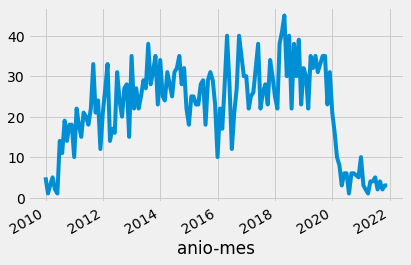

In [291]:
acce_resum1a.num_accidentes.plot()

In [30]:
adfuller(acce_resum1a.num_accidentes)  # Serie Original p-valor>0.05. No es estacionaria.

(-1.561295104461205,
 0.5030014408529455,
 8,
 134,
 {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382},
 855.8129177216604)

In [31]:
adfuller(acce_resum1a.num_accidentes.diff().dropna()) # Serie primera diferencia p-valor<0.05. Sí es estacionaria.

(-8.174704929374975,
 8.438017993906569e-13,
 4,
 137,
 {'1%': -3.479007355368944,
  '5%': -2.8828782366015093,
  '10%': -2.5781488587564603},
 848.5991829245463)

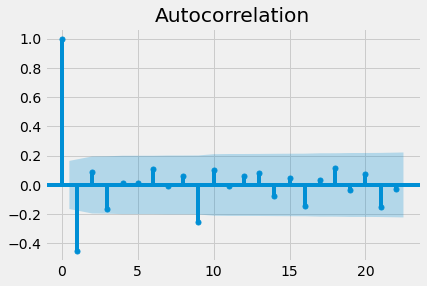

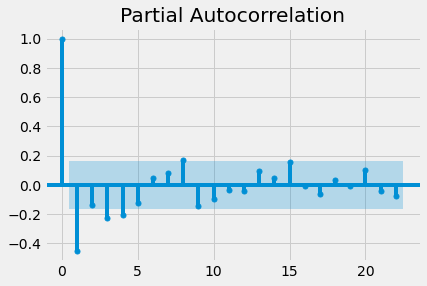

In [32]:
plot_acf(acce_resum1a.num_accidentes.diff().dropna())
plt.show()
plot_pacf(acce_resum1a.num_accidentes.diff().dropna(), method="ywm")
plt.show()

Ensayamos con tres modelos: ARIMA(1,1,0), ARIMA(0,1,1) y ARIMA(1,1,1)

In [33]:
modelo1 = ARIMA(acce_resum1a.num_accidentes, order=(1,1,0)).fit()
modelo2 = ARIMA(acce_resum1a.num_accidentes, order=(0,1,1)).fit()
modelo3 = ARIMA(acce_resum1a.num_accidentes, order=(1,1,1)).fit()

C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has 

La advertencia que aparece es debida a que no hay una frecuencia en la fecha que aparece en el índice. Como los datos son mensuales entonces asignemos dicha frecuencia. __TENGA MUCHO CUIDADO CON ESTA OPCIÓN YA QUE EN MUCHOS CASOS LAS PREDICCIONES NO ESTÁN DE ACUERDO CON LA FECHA QUE DEBERÍA SER DADO A QUE POR EJEMPLO, CON FRECUENCIAS DIARIAS, DISTINTOS AÑOS PUEDEN TENER UN NÚMERO DISTINTO DE DÍAS EN LA SERIE DE TIEMPO__.

In [34]:
acce_resum1a.index = pd.DatetimeIndex(acce_resum1a.index).to_period('M')

In [35]:
modelo1 = ARIMA(acce_resum1a.num_accidentes, order=(1,1,0)).fit()
modelo2 = ARIMA(acce_resum1a.num_accidentes, order=(0,1,1)).fit()
modelo3 = ARIMA(acce_resum1a.num_accidentes, order=(1,1,1)).fit()

Encontramos los AIC y los BIC:

In [36]:
print(modelo1.aic, modelo2.aic, modelo3.aic)
print(modelo1.bic, modelo2.bic, modelo3.bic)

954.9209469385894 943.5763300894387 945.4638697996122
960.8326010537919 949.4879842046412 954.331350972416


Tanto con el AIC como con el BIC gana el __modelo2__: ARIMA(0,1,1)

In [37]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         num_accidentes   No. Observations:                  143
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -469.788
Date:                Fri, 30 Sep 2022   AIC                            943.576
Time:                        12:39:29   BIC                            949.488
Sample:                    01-31-2010   HQIC                           945.979
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6142      0.062     -9.979      0.000      -0.735      -0.494
sigma2        43.6203      5.105      8.545      0.000      33.615      53.625
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.86   Prob(JB):                         0.97
Heteroskedasticity (H):               1.02   Skew:                            -0.04
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

__NOTE QUE:__ El test de Ljung-Box aparentemente solo aplica para ver si hay autocorrelación a un lag, es decir, entre $X_t$ y $X_{t-1}$. En este caso $h=1$, pero también es posible verificar para $h>1$:

In [38]:
sm.stats.acorr_ljungbox?

In [39]:
sm.stats.acorr_ljungbox(modelo2.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.018289,0.892426
2,0.123173,0.940272
3,3.609221,0.306870
4,3.655147,0.454683
5,4.668490,0.457661
6,9.425074,0.151045
7,9.945657,0.191674
8,10.030498,0.262892
9,20.021532,0.017780
10,20.103123,0.028292


Hasta el lag $h=8$ no hay autocorrelación en los residuales, lo cual es un indicativo de que no son autocorrelacionados.

## Recuerde que el modelo ARIMA(p, d, q) está dado por:

$$\phi(B)(1-B)^dX_t=\theta(B)w_t$$
donde 
$$\phi(B)=1-\phi_1B-\phi_2B^2-\cdots-\phi_pB^p$$
y
$$\theta(B)=1+\theta_1B+\theta_2B^2+\cdots+\theta_pB^q$$

Así, el modelo estimado __modelo2__ : ARIMA(0,1,1), está dado por:
$$(1-B)X_t=\theta(B)w_t$$
Es decir,
$$X_t-X_{t-1}=(1-(-0.6142)B)w_t\ \implies\ X_t=X_{t-1}+w_t+0.6142w_{t-1}$$


Hagamos ahora un diagnóstico del modelo 2:

C:\Users\Mauricio Mazo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


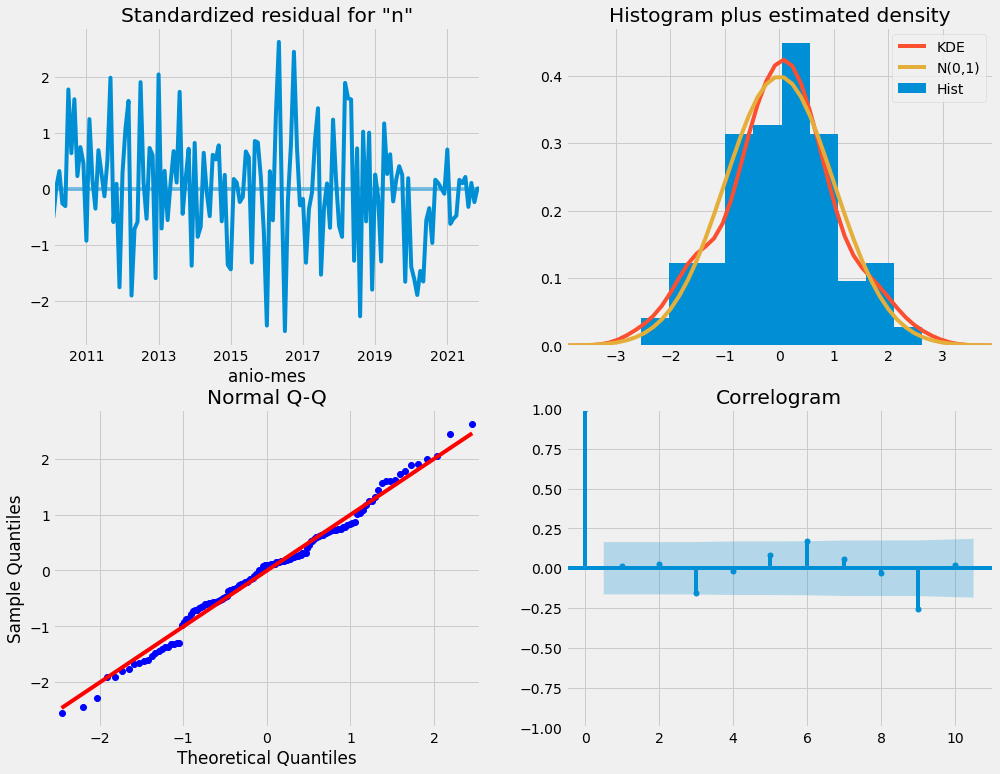

In [40]:
modelo2.plot_diagnostics(figsize=(15,12))
plt.show()

Realicemos pronósticos:

In [41]:
acce_resum1a

,anio,mes,num_accidentes
anio-mes,,,
2010-01,2010,1,5
2010-02,2010,2,1
2010-03,2010,3,3
2010-04,2010,4,5
2010-05,2010,5,2
...,...,...,...
2021-08,2021,8,2
2021-09,2021,9,4
2021-10,2021,10,2


In [42]:
fore = modelo2.get_forecast(6) # Note que está haciendo predicción del 2021-12 porque no hay 12*12=144 datos sino 143
fore_ci = fore.conf_int()
fore_ci

,lower num_accidentes,upper num_accidentes
2021-12,-9.955808,15.933627
2022-01,-10.885655,16.863474
2022-02,-11.756983,17.734803
2022-03,-12.579622,18.557442
2022-04,-13.360923,19.338742
2022-05,-14.106553,20.084372


In [43]:
pred = modelo2.get_prediction(start="2022-1", end="2022-5", dynamic=False) # dynamic=False evita que las predicciones futuras
                                                               # se conviertan en datos de la muestra para predicciones 
                                                               # que van más adelante.
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower num_accidentes,upper num_accidentes
2022-01,-10.885655,16.863474
2022-02,-11.756983,17.734803
2022-03,-12.579622,18.557442
2022-04,-13.360923,19.338742
2022-05,-14.106553,20.084372


In [44]:
pred.predicted_mean

2022-01    2.98891
2022-02    2.98891
2022-03    2.98891
2022-04    2.98891
2022-05    2.98891
Freq: M, Name: predicted_mean, dtype: float64

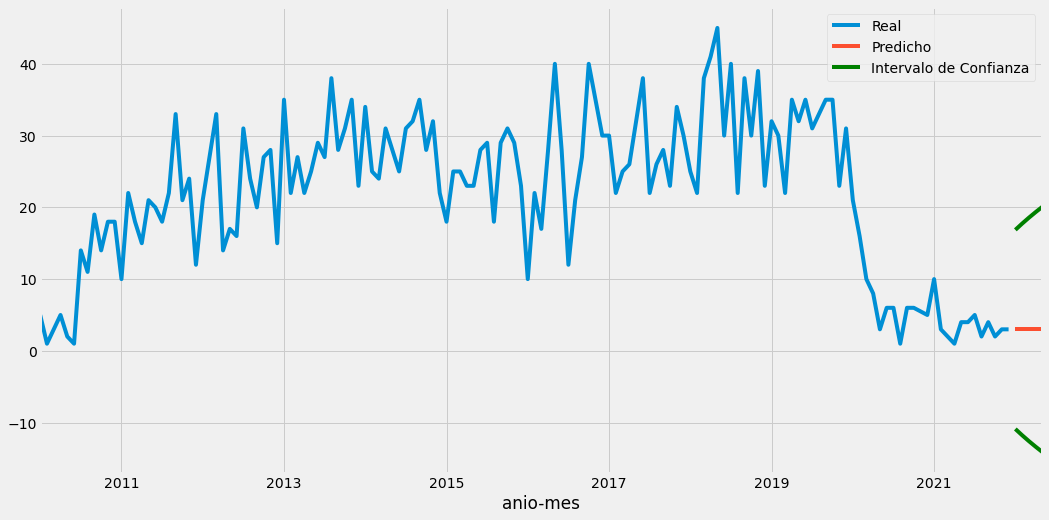

In [45]:
plt.figure(figsize=(16,8))  #  Graficamos:
acce_resum1a.num_accidentes.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])